## Лабораторна робота № 5 Алгоритми пошуку. Стратегія "грубої сили".
## Мета. Засвоїти варіанти реалізації алгоритмів пошуку засобами Python і методи оцінки їх складності.
### Виконав: Яцентюк Євгеній, група: КІ-24-1 

**[GitHub](https://github.com/kefir4ikk)**

# 1. LinearSearch

In [2]:
def linear_search(a_list, x):
    i, length = 0, len(a_list)
    while i < length and x != a_list[i]:
        i += 1
    return i if i < length else -1

a = [32, 1, 3, 4, 2, 1]
search_item = int(input("Введіть шуканий елемент: "))

result = linear_search(a, search_item)

print (result)

Введіть шуканий елемент:  3


2


# 2. BinSearch

In [3]:
def bin_search(a_list, x, left, right):
    if left > right or len(a_list) == 0:
        return -1
    middle = (left + right) // 2
    if a_list[middle] == x:
        return middle
    elif (a_list[middle] < x):
        return bin_search(a_list, x, middle + 1, right)
    else:       # a_list[middle] > x
        return bin_search(a_list, x, left, middle - 1)

a = range(7,21)

search_item=int(input("Введість шуканий едемент:"))

result = bin_search(a, search_item, 0, len(a) - 1)

print (result)

Введість шуканий едемент: 3


-1


# Завдання на самостійну роботу:

**Порівняння Бінарний, Лінійний пошук**

##### Функція linear_search() + замір часу → датафрейм

In [7]:
import time
import pandas as pd
import random

def linear_search(arr, value):
    for i in range(len(arr)):
        if arr[i] == value:
            return i
    return -1
    
def measure_linear():
    results = []
    for n in [10_000, 50_000, 100_000, 200_000, 300_000]:
        arr = list(range(n))
        value = random.choice(arr)

        start = time.time()
        linear_search(arr, value)
        end = time.time()

        results.append((n, end - start))

    return pd.DataFrame(results, columns=["n", "time"])

##### Функція bin_search() + замір часу → датафрейм

In [8]:
# Бінарний пошук (ітеративний — швидший за рекурсію)
def binary_search(arr, value):
    left = 0
    right = len(arr) - 1

    while left <= right:
        mid = (left + right) // 2
        if arr[mid] == value:
            return mid
        elif arr[mid] < value:
            left = mid + 1
        else:
            right = mid - 1
    return -1

# Повертає DataFrame ("n", "time")
def measure_binary():
    results = []
    for n in [10_000, 50_000, 100_000, 200_000, 300_000]:
        arr = list(range(n))
        value = random.choice(arr)

        start = time.time()
        binary_search(arr, value)
        end = time.time()

        results.append((n, end - start))

    return pd.DataFrame(results, columns=["n", "time"])

##### Побудова графіка

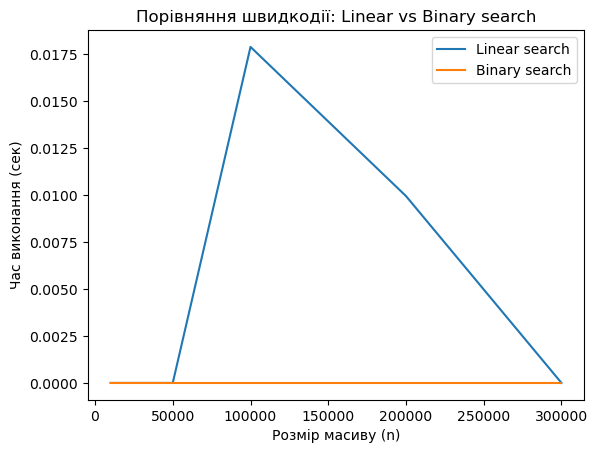

In [9]:
import matplotlib.pyplot as plt

df_linear = measure_linear()
df_binary = measure_binary()

plt.plot(df_linear["n"], df_linear["time"], label="Linear search")
plt.plot(df_binary["n"], df_binary["time"], label="Binary search")
plt.xlabel("Розмір масиву (n)")
plt.ylabel("Час виконання (сек)")
plt.title("Порівняння швидкодії: Linear vs Binary search")
plt.legend()
plt.show()

# Відповідь на контрольні запитання:

### 1. Визначення складності задачі з нотацією 𝛀 (Омега):

Нотація **Ω (Омега)** використовується для опису **нижньої межі** складності алгоритму.

> **f(n) = Ω(g(n))** означає, що функція *f(n)* зростає **не повільніше**, ніж *g(n)* при достатньо великих *n*.  
> Тобто *g(n)* — це асимптотична **нижня оцінка** для *f(n)*.

Формальне визначення:

$$
f(n) = \Omega(g(n)) \quad \text{якщо існують константи} \; c > 0 \; \text{та} \; n_0,\; \text{такі що} \quad f(n) \ge c \cdot g(n) \; \text{для всіх} \; n \ge n_0
$$

Іншими словами, нотація **Ω** показує, що алгоритм потребує **не менше** ніж \( g(n) \) операцій.


### 2. Дано функцію часової складності:

$$
F(N) = N^3 + 7N^2 - 14N
$$

Домінантний член — $N^{3}$, оскільки він зростає швидше за всі інші доданки при великих $N^{3}$.

Тому асимптотична складність алгоритму:

$$
F(N) = O(N^3)
$$

### 3. Дано функцію часової складності:

Функція має вигляд:

$$
F(N) = 1.01^N + N^{10}
$$

Домінантний член — $1.01^{N}$, оскільки експоненціальна функція зростає значно швидше за будь-який поліном при великих $N$.

Тому асимптотична складність алгоритму:

$$
F(N) = O(1.01^N)
$$


### 4. Дано функцію часової складності:

$$
F(N) = N^{1.3} + 10 \log_2 N
$$

Домінантний член — $N^{1.3}$, оскільки поліном зростає швидше за логарифмічну функцію при великих $N$.

**Тому асимптотична складність алгоритму:**

$$
F(N) = O(N^{1.3})
$$


### 5.  У чому полягає ідея розпараллелювання обчислень і для чого вона використовується? Які з алгоритмів, наведених у даній лаораторній роботі дозволяють можливість розпаралелювання? 

**У чому полягає ідея розпаралелювання обчислень?**

Ідея розпаралелювання полягає в тому, щоб розбити велику задачу на декілька менших незалежних частин і виконувати їх одночасно на кількох процесорних ядрах або пристроях. Це дозволяє скоротити загальний час виконання програми, підвищити продуктивність і ефективність використання ресурсів.

Основна ціль — прискорення обчислень за рахунок одночасного виконання операцій, які не залежать одна від одної.

**Для чого використовується розпаралелювання?**

- для прискорення роботи алгоритмів;
- для обробки великих обсягів даних (Big Data, машинне навчання, симуляції);
- для підвищення ефективності систем із багатоядерними процесорами;
- для зменшення часу реакції програм у реальному часі.

**Які алгоритми з лабораторної роботи можна розпаралелювати?**

У даній лабораторній роботі розглядаються два алгоритми пошуку:
- Лінійний пошук (стратегія “грубої сили”) 
- Бінарний пошук (пошук у відсортованому масиві) 

Розпаралелювання можливе лише там, де обчислення не залежать одне від одного.

Лінійний пошук допускає розпаралелювання.
Масив можна розділити на декілька частин і виконувати перевірку елементів паралельно в різних потоках чи на різних ядрах. Кожен потік шукає значення у своїй частині масиву. Якщо один потік знаходить елемент — інші припиняються.

Бінарний пошук практично не допускає ефективного розпаралелювання, оскільки кожен наступний крок залежить від результату попереднього (спочатку визначається середній елемент, і тільки після цього стає відомо, в якій половині продовжувати пошук). Алгоритм є послідовним за структурою.

### 6. Які існують шляхи підвищення обчислювальної швидкості алгоритмів?

Основні способи підвищення швидкості алгоритмів:

1. **Оптимізація алгоритму (зменшення асимптотичної складності):**
Вибір більш ефективного алгоритму замість менш ефективного.
Наприклад, заміна лінійного пошуку $O(n)$ на бінарний $O(log n)$

2. **Оптимізація структури даних:**
Правильний вибір структури даних може значно скоротити час виконання.
Наприклад, використання хеш-таблиці замість списку.

3. **Розпаралелювання обчислень:**
Поділ задачі на незалежні частини та виконання їх на кількох ядрах процесора одночасно.

4. **Використання апаратного прискорення:**
Застосування багатоядерних процесорів, GPU, SIMD-інструкцій тощо.

5. **Оптимізація коду на рівні реалізації:**
Зменшення кількості операцій у циклах, кешування результатів (memoization), використання ефективних бібліотек. 